# Best techniques for dimensionality reduction

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# df = pd.read_csv('https://raw.githubusercontent.com/treselle-systems/customer_churn_analysis/master/WA_Fn-UseC_-Telco-Customer-Churn.csvhttps://raw.githubusercontent.com/treselle-systems/customer_churn_analysis/master/WA_Fn-UseC_-Telco-Customer-Churn.csv')
# df.head()

In [10]:
df = pd.read_csv('https://raw.githubusercontent.com/krishnaik06/Predicting-Heart-Disease/master/dataset.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [11]:
X = df.iloc[:,1:-1]
y = df.iloc[:,-1:]
X

,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,1,3,145,233,1,0,150,0,2.3,0,0,1
1,1,2,130,250,0,1,187,0,3.5,0,0,2
2,0,1,130,204,0,0,172,0,1.4,2,0,2
3,1,1,120,236,0,1,178,0,0.8,2,0,2
4,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
298,0,0,140,241,0,1,123,1,0.2,1,0,3
299,1,3,110,264,0,1,132,0,1.2,1,0,3
300,1,0,144,193,1,1,141,0,3.4,1,2,3
301,1,0,130,131,0,1,115,1,1.2,1,1,3


In [12]:
y

,target
0,1
1,1
2,1
3,1
4,1
...,...
298,0
299,0
300,0
301,0


# CORRELATION MAP

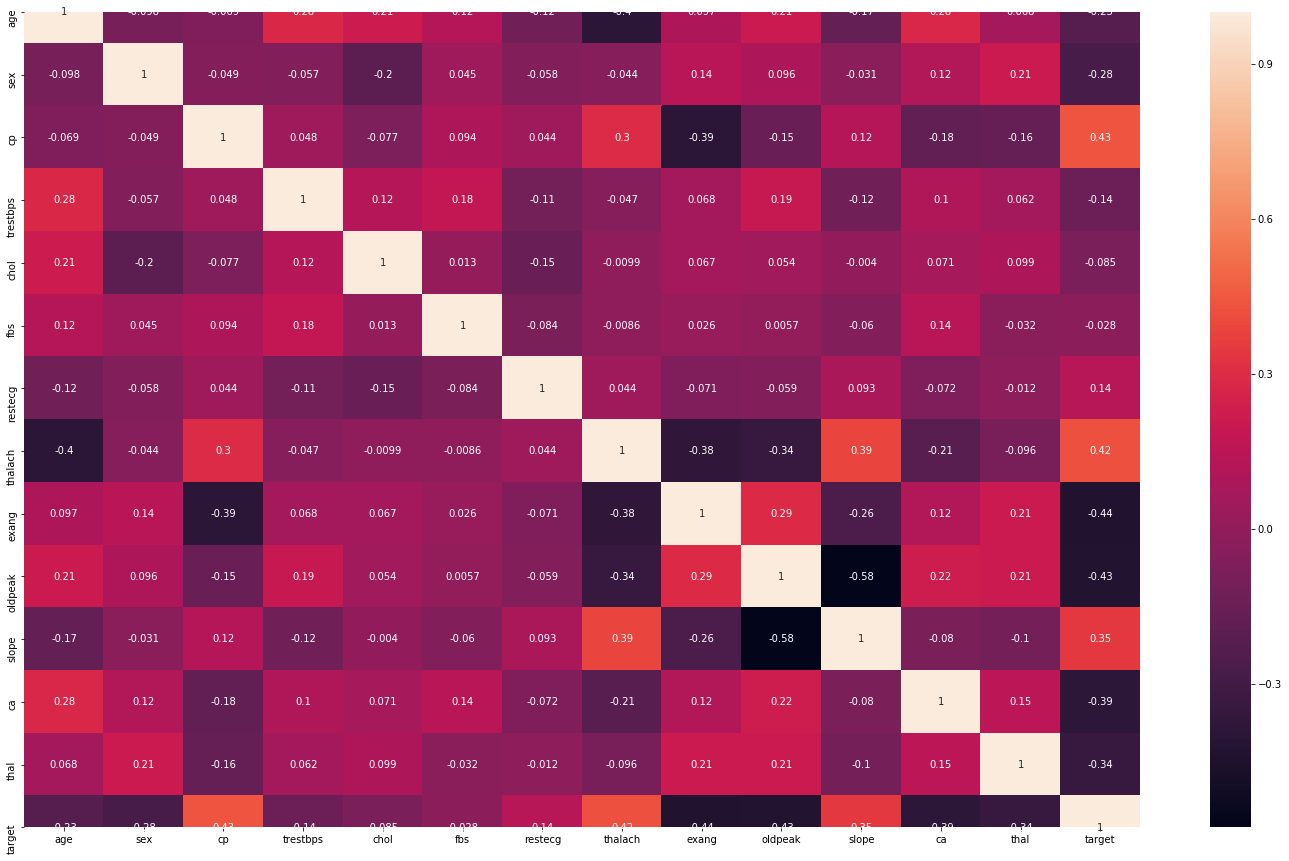

In [13]:
#CORRELATION HEATMAP
plt.figure(figsize = (25,15))
sns.heatmap(df.corr(), annot = True); plt.show()

# DIM REDUCTION WITH SIMPLE CORRELATION

target     1.000000
exang      0.436757
cp         0.433798
oldpeak    0.430696
thalach    0.421741
ca         0.391724
Name: target, dtype: float64


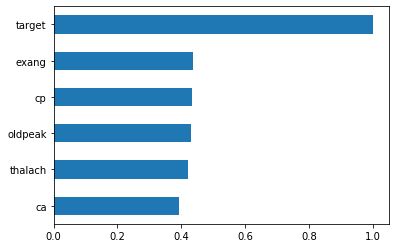

0.4337982615068916
0.4217409338106738
0.4367570833532994
0.4306960016873676
0.3917239923512518
1.0


In [14]:
#DIM REDUCTION WITH SIMPLE CORRELATION

cor = df.corr()
cor_target = abs(cor["target"])

relevant_features = cor_target[cor_target>0.35]
print(relevant_features.sort_values(ascending = False))
relevant_features.sort_values(ascending = True).plot(kind = 'barh');plt.show()

for el in relevant_features:
    print(el)

# LASSO CV - coef_

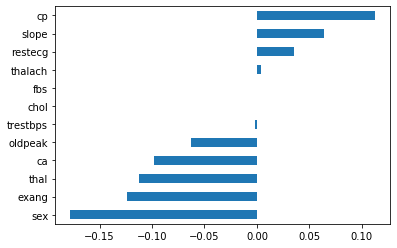

In [15]:
#LASSO CV

from sklearn.linear_model import LassoCV

model = LassoCV(cv = 5).fit(X, np.ravel(y))

pd.Series(model.coef_, index = X.columns).sort_values().plot(kind = "barh"); plt.show()


# SELECT KBEST CHI2 - scores_

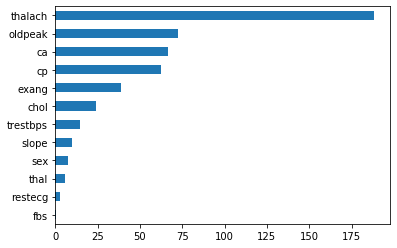

In [16]:
#SELECT KBEST CHI2

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

model = SelectKBest(score_func=chi2, k=10).fit(X,y)

pd.Series(model.scores_, index = X.columns).sort_values(ascending = True).plot(kind = 'barh')


# EXTRA TREE CLASSIFIER - feature_importances_

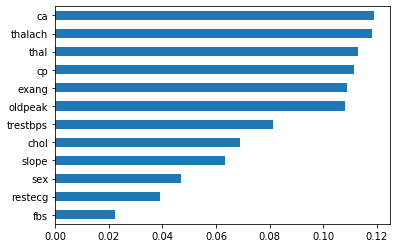

In [17]:
#EXTRA TREE CLASSIFIER

from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier(n_estimators = 10).fit(X,np.ravel(y))

pd.Series(model.feature_importances_, index = X.columns).sort_values(ascending = True).plot(kind='barh'); plt.show()


In [19]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#scaler = MinMaxScaler()
scaler = StandardScaler()
scaler.fit(df)
scaled_data = scaler.transform(df)

pd.DataFrame(scaled_data.reshape(df.shape[0], -1), columns = df.columns)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.952197,0.681005,1.973123,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,1.087338,-2.274579,-0.714429,-2.148873,0.914529
1,-1.915313,0.681005,1.002577,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,2.122573,-2.274579,-0.714429,-0.512922,0.914529
2,-1.474158,-1.468418,0.032031,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,0.310912,0.976352,-0.714429,-0.512922,0.914529
3,0.180175,0.681005,0.032031,-0.663867,-0.198357,-0.417635,0.898962,1.239897,-0.696631,-0.206705,0.976352,-0.714429,-0.512922,0.914529
4,0.290464,-1.468418,-0.938515,-0.663867,2.082050,-0.417635,0.898962,0.583939,1.435481,-0.379244,0.976352,-0.714429,-0.512922,0.914529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.290464,-1.468418,-0.938515,0.478391,-0.101730,-0.417635,0.898962,-1.165281,1.435481,-0.724323,-0.649113,-0.714429,1.123029,-1.093459
299,-1.033002,0.681005,1.973123,-1.234996,0.342756,-0.417635,0.898962,-0.771706,-0.696631,0.138373,-0.649113,-0.714429,1.123029,-1.093459
300,1.503641,0.681005,-0.938515,0.706843,-1.029353,2.394438,0.898962,-0.378132,-0.696631,2.036303,-0.649113,1.244593,1.123029,-1.093459
301,0.290464,0.681005,-0.938515,-0.092738,-2.227533,-0.417635,0.898962,-1.515125,1.435481,0.138373,-0.649113,0.265082,1.123029,-1.093459
